<a href="https://colab.research.google.com/github/vassilyf/ml/blob/main/Lesson_11_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mutual_info_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold, SelectKBest, \
    f_classif, SelectFromModel, SequentialFeatureSelector

import seaborn as sns

In [5]:
from sklearn.datasets import make_classification
X, y = make_classification(scale=1, random_state=42)
df = pd.DataFrame(X)
df['Target'] = y

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

cross_val_score(LogisticRegression(), X, y, scoring='accuracy').mean()

0.9800000000000001

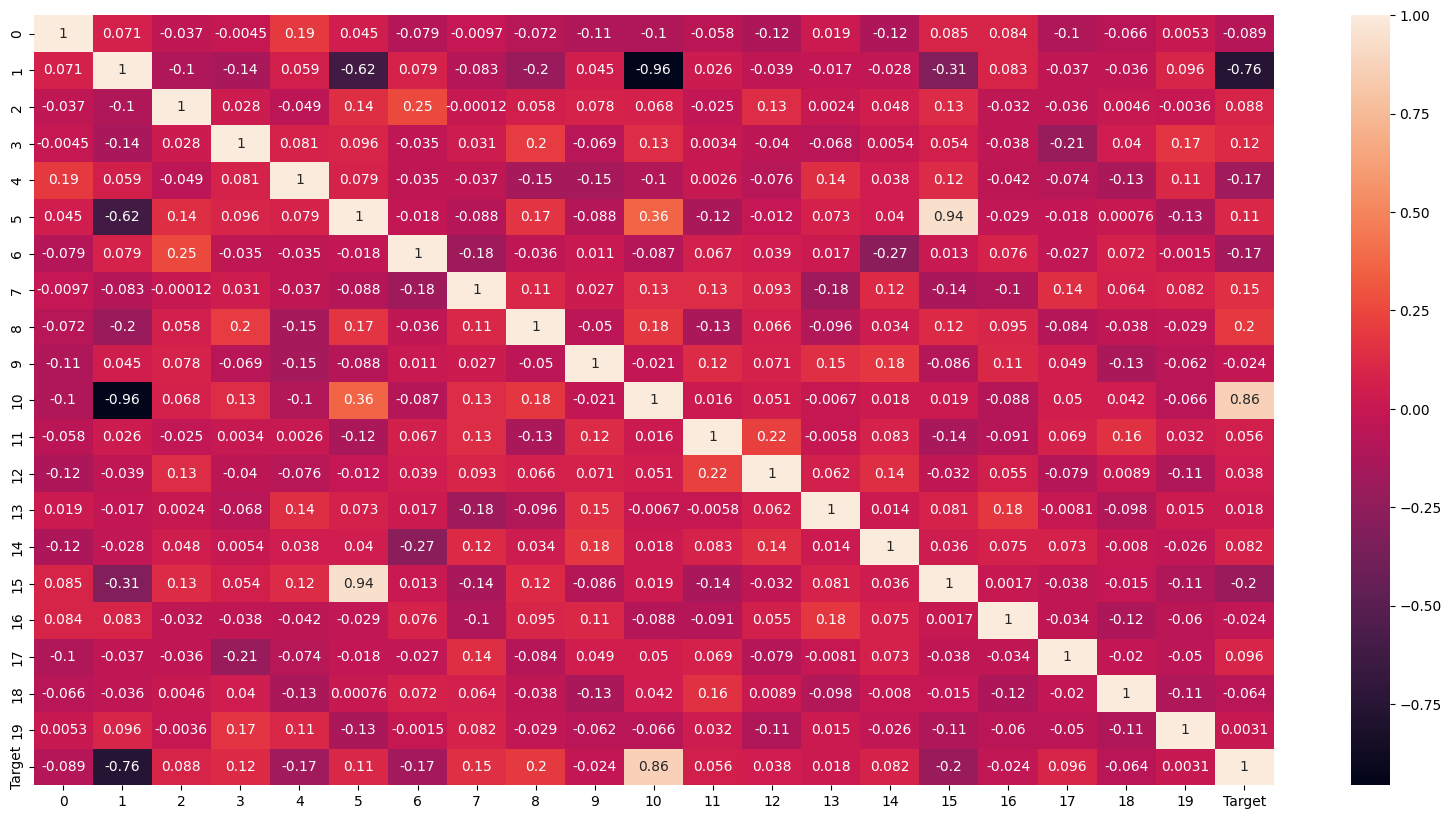

In [16]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)
plt.show()

In [17]:
df_hc = df[[1, 3, 4, 5, 6, 7, 8, 10, 15]]
df_hc.head()


,1,3,4,5,6,7,8,10,15
0,0.029102,-0.114736,0.504987,0.088962,0.404982,-0.653329,0.186454,-0.071335,0.087142
1,0.659924,-1.227608,0.597400,0.865620,0.015579,0.125576,0.453534,-1.158068,0.963360
2,0.950573,-0.530997,-0.623141,-2.255540,0.471416,-0.570746,0.492451,-0.270624,-1.692005
3,-0.320670,-0.535235,1.317394,-1.146581,-0.483886,0.197911,0.393485,0.852392,-1.106450
4,-0.222100,0.940771,-0.982487,1.560103,0.319782,-1.334025,1.392002,-0.348985,1.303736


In [18]:
selector = VarianceThreshold()
df_hc2 = selector.fit_transform(df_hc)
print(len(df_hc.columns), len(df_hc2[0]))

9 9


У всех признаков хорошая вариативность

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

cross_val_score(LogisticRegression(), X, y, scoring='accuracy').mean()

0.9800000000000001

In [14]:
selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X, y)
cols_idxs = selector.get_support(indices=True)
print(cols_idxs)
#features_df_new = features_df.iloc[:,cols_idxs]
cross_val_score(LogisticRegression(), X_new, y, scoring='accuracy').mean()

[ 1  4  8 10 15]


0.9800000000000001

In [31]:
selector = SelectFromModel(estimator=LogisticRegression()).fit(X, y)

X_tr = selector.transform(X)
cols_idxs = selector.get_support(indices=True)
print(cols_idxs)

cross_val_score(LogisticRegression(), X_tr, y, scoring='accuracy').mean()

[ 1  5 10 15]


0.99

In [42]:
rfm = RandomForestClassifier(random_state=42)
rfm.fit(X, y)
#rfm.feature_importances_
df_i = pd.DataFrame({'imp': rfm.feature_importances_, 'column': df.iloc[:,:-1].columns})
# первые наиболее значимые признаки
sig_5_cols = df_i.sort_values(by='imp', ascending=False)['column'].values[:4]
print(sig_5_cols)
df_hc = df[sig_5_cols]

cross_val_score(LogisticRegression(), df_hc.values, y, scoring='accuracy').mean()

[10 1 15 5]


0.99

In [43]:
knn = KNeighborsClassifier(n_neighbors=3)
selector = SequentialFeatureSelector(knn, n_features_to_select=4)
selector.fit(X, y)
print(selector.get_support())

X_sfs = selector.transform(X)
cross_val_score(LogisticRegression(), X_sfs, y, scoring='accuracy').mean()

[False False False False  True False False False False False  True False
 False False False  True False  True False False]


0.9800000000000001

|способ выбора признаков|количество признаков|средняя точность модели|
|---|---|---|  
|все признаки|20|0.98|  
|по матрице корреляции|9|0.98|  
|SelectKBest|5|0.98|  
|SelectFromModel|4|0.99|  
|RandomForest|4|0.99|  
|SequentialFeatureSelector|4|0.98|
